In [1]:
import pandas as pd
import spacy
import emoji
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/andy/Documents/DS/TFM SALLE/project/Malbert/Malbert_videos.csv')
df = df[df['transcript'] != 'Subtitle not available']
df['transcript'] = df['transcript'].str.replace('\xa0__\xa0', 'xxxx')

In [3]:
print(df.isnull().sum())

video_id        0
title           0
description     0
publish_date    0
likes           0
views           0
comments        0
transcript      0
dtype: int64


In [4]:
# Load Spanish tokenizer, POS tagger, parser, NER and word vectors
nlp = spacy.load('es_core_news_sm')

def preprocess(text):
    # Lowercase the text
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove emojis
    text = emoji.replace_emoji(text, replace='')

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize, remove stop words, and lemmatize using SpaCy's Spanish model
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]

    return tokens


In [5]:
%%time

# Apply preprocessing to each column
df['title'] = df['title'].apply(preprocess)
df['description'] = df['description'].apply(preprocess)
df['transcript'] = df['transcript'].apply(preprocess)

CPU times: user 1min 33s, sys: 4.76 s, total: 1min 37s
Wall time: 1min 46s


In [6]:
# Save the DataFrame as CSV
df.to_csv('preprocessed_data.csv', index=False)

In [7]:
# Title
# Word frequency analysis
title_tokens = [token for title in df['title'] for token in title]

# Count the occurrences of each token
word_freq = Counter(title_tokens)

# Display the 10 most common words and their frequencies
most_common_words = word_freq.most_common(15)
print(most_common_words)

# If you prefer the output in a DataFrame
df_word_freq = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
print(df_word_freq)

[('malbert', 273), ('reacción', 72), ('ot', 66), ('eurovision', 64), ('gala', 30), ('review', 21), ('to', 14), ('reacting', 13), ('amaia', 10), ('canción', 9), ('alfred', 9), ('haul', 9), ('benidorm', 8), ('fest', 8), ('red', 8)]
          Word  Frequency
0      malbert        273
1     reacción         72
2           ot         66
3   eurovision         64
4         gala         30
5       review         21
6           to         14
7     reacting         13
8        amaia         10
9      canción          9
10      alfred          9
11        haul          9
12    benidorm          8
13        fest          8
14         red          8


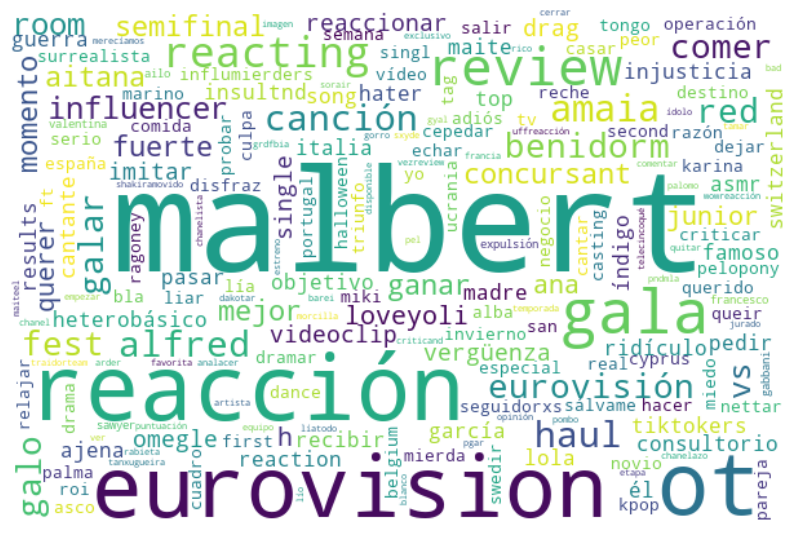

In [8]:

title_words = ' '.join([' '.join(doc) for doc in df['title']])

# Generate the word cloud.
wordcloud = WordCloud(background_color="white",  # Set the background color to white
                      width=600,                # Width of the canvas
                      height=400,               # Height of the canvas
                      collocations=False,       # Avoid duplicate words
                      colormap='viridis'        # Color scheme
                     ).generate(title_words)

# Plot the word cloud.
plt.figure(figsize=(10, 8))      
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Save the visualization to a file.
plt.savefig("title_wordcloud.png")

plt.show()


In [9]:
# Description
# Word frequency analysis
description_tokens = [token for description in df['description'] for token in description]

# Count the occurrences of each token
word_freq = Counter(description_tokens)

# Display the 15 most common words and their frequencies
most_common_words = word_freq.most_common(15)
print(most_common_words)

# If you prefer the output in a DataFrame
df_word_freq = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
print(df_word_freq)

[('itsmalbert', 789), ('contacto', 519), ('red', 301), ('instagram', 295), ('twitter', 286), ('facebook', 285), ('holamalbertgmailcom', 285), ('vídeo', 276), ('malbert', 259), ('malbertdscopees', 236), ('personal', 235), ('business', 235), ('canal', 229), ('hacer', 212), ('gustar', 204)]
                   Word  Frequency
0            itsmalbert        789
1              contacto        519
2                   red        301
3             instagram        295
4               twitter        286
5              facebook        285
6   holamalbertgmailcom        285
7                 vídeo        276
8               malbert        259
9       malbertdscopees        236
10             personal        235
11             business        235
12                canal        229
13                hacer        212
14               gustar        204


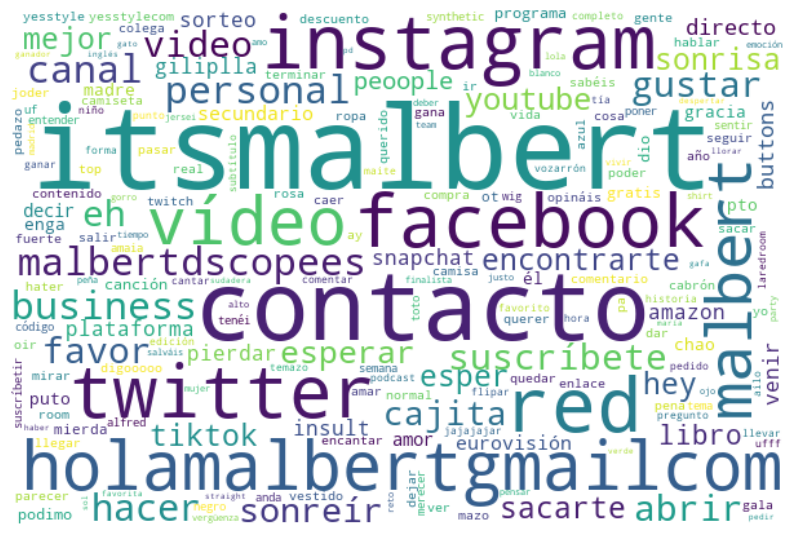

In [10]:

description_words = ' '.join([' '.join(doc) for doc in df['description']])

# Generate the word cloud.
wordcloud = WordCloud(background_color="white",  # Set the background color to white
                      width=600,                # Width of the canvas
                      height=400,               # Height of the canvas
                      collocations=False,       # Avoid duplicate words
                      colormap='viridis'        # Color scheme
                     ).generate(description_words)

# Plot the word cloud.
plt.figure(figsize=(10, 8))      
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Save the visualization to a file.
plt.savefig("description_wordcloud.png")

plt.show()
